# 案例：使用PCA进行二维数据降维

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [3]:
mat = sio.loadmat('E:/ML_NG/7-kmeans and PCA/data/ex7data1.mat')
X = mat['X']
X.shape

(50, 2)

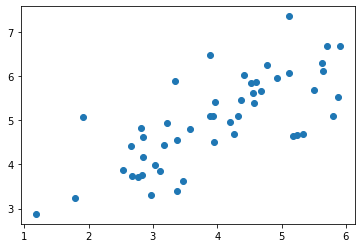

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

# 对X去均值化

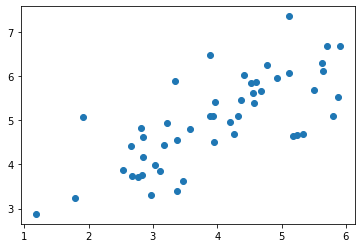

In [5]:
X_demean = X - np.mean(X,axis=0)  #按行取每列均值
plt.scatter(X[:,0],X[:,1])
plt.show()

# 计算协方差矩阵

In [6]:
C = X_demean.T @ X_demean / len(X)
C

array([[1.34852518, 0.86535019],
       [0.86535019, 1.02641621]])

# 计算协方差矩阵特征值，特征向量

In [7]:
U,S,V = np.linalg.svd(C)

In [8]:
S

array([2.06768062, 0.30726078])

In [9]:
U

array([[-0.76908153, -0.63915068],
       [-0.63915068,  0.76908153]])

In [10]:
U1= U[:,0]

# 实现降维

In [11]:
X_reduction = X_demean @ U1

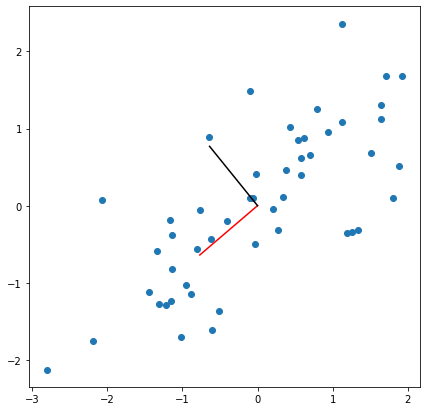

In [17]:
plt.figure(figsize=(7,7))

plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,U1[0]],[0,U1[1]],c='r')
plt.plot([0,U[:,1][0]],[0,U[:,1][1]],c='k')
plt.show()

# 还原数据

In [20]:
X_restore= X_reduction.reshape(50,1)@U1.reshape(1,2) + np.mean(X,axis=0)

In [18]:
X_reduction.shape,U1.shape

((50,), (2,))

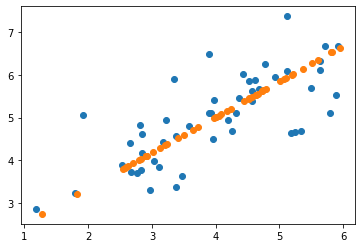

In [21]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_restore[:,0],X_restore[:,1])
plt.show()